In [77]:
import pandas as pd
import seaborn as sn
import numpy as np
nba = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA_data.csv')
nba_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA_test_data2.csv')
nba.dataframeName = 'mvp_votings.csv'


In [78]:
nba['3P%']=nba['3P%'].fillna(0)

Text(0.5, 0, 'Win share')

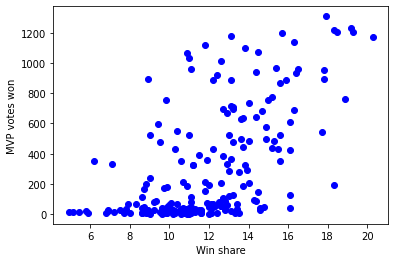

In [79]:
import matplotlib.pyplot as plt
plt.plot(nba['WS'],nba['Pts_Won'],'bo')
plt.ylabel("MVP votes won")
plt.xlabel('Win share')

Text(0.5, 0, 'Win share average')

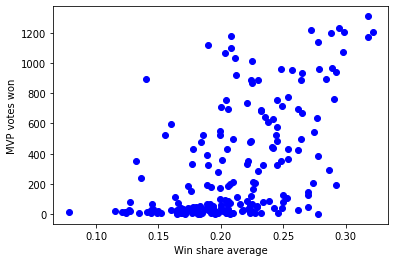

In [80]:
plt.plot(nba['WS/48'],nba['Pts_Won'],'bo')
plt.ylabel("MVP votes won")
plt.xlabel('Win share average')

In [81]:
def mse_random_forest(estimators, data_X, data_y, val_X, val_y):
    test_model = RandomForestRegressor(n_estimators = estimators, random_state = 1)
    test_model.fit(data_X, data_y)
    predictions_y = test_model.predict(val_X)
    return mean_squared_error(val_y, predictions_y)

def mse_multi_layer_perceptron(hidden_layer_size_test, alpha_given, data_X, data_y, val_X, val_y):
    test_model = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = hidden_layer_size_test, alpha = alpha_given, random_state = 1) 
    #The LBFGS optimizer is being used due to dataset size
    test_model.fit(data_X, data_y)
    predictions_y = test_model.predict(val_X)
    return mean_squared_error(val_y, predictions_y)
def mse_sgd(iter_test, alpha_given, data_X, data_y, val_X, val_y):
    test_model = SGDRegressor(max_iter = iter_test, alpha = alpha_given)
    test_model.fit(data_X, data_y)
    predictions_y = test_model.predict(val_X)
    return mean_squared_error(val_y, predictions_y)
    

In [82]:
from sklearn.linear_model import LogisticRegression
y=nba.Pts_Won
y_2=nba.Share
feature_names=['Age','G','MP','PTS','TRB','AST','STL','BLK','FG%','3P%','FT%','WS','WS/48']
X=nba[feature_names]
print(nba.isnull().any())
logreg = LogisticRegression(max_iter=1000)

Rank       False
Player     False
Age        False
Tm         False
First      False
Pts_Won    False
Pts_Max    False
Share      False
G          False
MP         False
PTS        False
TRB        False
AST        False
STL        False
BLK        False
FG%        False
3P%        False
FT%        False
WS         False
WS/48      False
dtype: bool


In [83]:
from sklearn import svm #Support vector machine
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge #Ridge regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor #Multi-layer perceptron network
from sklearn.metrics import mean_squared_error #Metric used for selecting best model
from sklearn.model_selection import train_test_split #Utility function for creating training and validation data
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
#Data is split here, for training and cross-validation sets
train_X, val_X, train_y, val_y = train_test_split(X_scaled, y, random_state = 0)
train_X2, val_X2, train_y2, val_y2 = train_test_split(X_scaled, y_2, random_state = 1)
#Testing for which combination of characteristics helps produce the lowest validation error
#RANDOM FOREST REGRESSION
estimator_count = [50, 100, 200, 500, 1000]
print("RANDOM FOREST OPTIONS")
for estimator in estimator_count:
  print("Estimator count:", estimator, "| Mean Squared Error:", mse_random_forest(estimator, train_X, train_y, val_X, val_y))
mvp_model = RandomForestRegressor(n_estimators = 500, random_state = 1)#500 was found to be the best estimator count, a tad high but it should serve its purpose
print('-----------------------------------------------------------------------------------------------------------')
#MULTI-LAYER PERCEPTRON
hidden_layer_sizes_test = [50, 100, 150, 200, 250]
alpha = [0.0001, 0.0003, 0.001, 0.003]
print("MULTI LAYER PERCEPTRON OPTIONS")
for layer_size in hidden_layer_sizes_test:
    for alp_test in alpha:
        print("Layer size: ", layer_size, "| Alpha: ", alp_test, "| Mean Squared Error: ", mse_multi_layer_perceptron(layer_size, alp_test, train_X, train_y, val_X, val_y))
mvp_modelMLP = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = 150, alpha = 0.003, random_state = 1) 
print('-----------------------------------------------------------------------------------------------------------')
#STOCHASTIC GRADIENT DESCENT
print("STOCHASTIC GRADIENT DESCENT OPTIONS")
max_iters = [500, 1000, 1500, 2000, 2500]
for iter_test in max_iters:
    for alp_test in alpha:
        print("Maximum iterations: ", iter_test, "| Alpha: ", alp_test, "| Mean Squared Error: ", mse_sgd(iter_test, alp_test, train_X, train_y, val_X, val_y))
mvp_modelSGD = SGDRegressor(max_iter = 2500, alpha = 0.0003) 
mvp_modelRidge = Ridge()
mvp_modelSVR = svm.SVR()
mvp_model.fit(train_X, train_y)
mvp_modelMLP.fit(train_X, train_y)
mvp_modelSGD.fit(train_X, train_y)
mvp_modelRidge.fit(train_X, train_y)
mvp_modelSVR.fit(train_X, train_y)

RANDOM FOREST OPTIONS
Estimator count: 50 | Mean Squared Error: 86249.23057599999
Estimator count: 100 | Mean Squared Error: 87223.01498200001
Estimator count: 200 | Mean Squared Error: 86449.6411805
Estimator count: 500 | Mean Squared Error: 86907.07909464002
Estimator count: 1000 | Mean Squared Error: 88255.79241483999
-----------------------------------------------------------------------------------------------------------
MULTI LAYER PERCEPTRON OPTIONS
Layer size:  50 | Alpha:  0.0001 | Mean Squared Error:  329006.75462053774


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  50 | Alpha:  0.0003 | Mean Squared Error:  329167.5285581234
Layer size:  50 | Alpha:  0.001 | Mean Squared Error:  328437.82184284733


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  50 | Alpha:  0.003 | Mean Squared Error:  327442.99590282445


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  100 | Alpha:  0.0001 | Mean Squared Error:  174280.75522972838


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  100 | Alpha:  0.0003 | Mean Squared Error:  173868.2786130404


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  100 | Alpha:  0.001 | Mean Squared Error:  173411.67718539736


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  100 | Alpha:  0.003 | Mean Squared Error:  173631.56214620388


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  150 | Alpha:  0.0001 | Mean Squared Error:  331295.5230014789


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  150 | Alpha:  0.0003 | Mean Squared Error:  329058.44006301626


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  150 | Alpha:  0.001 | Mean Squared Error:  329039.2485269789


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  150 | Alpha:  0.003 | Mean Squared Error:  331445.4317172672


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  200 | Alpha:  0.0001 | Mean Squared Error:  287213.9278192954


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  200 | Alpha:  0.0003 | Mean Squared Error:  287333.0117294875


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  200 | Alpha:  0.001 | Mean Squared Error:  287871.4068421125


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  200 | Alpha:  0.003 | Mean Squared Error:  309688.1809564759


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  250 | Alpha:  0.0001 | Mean Squared Error:  251788.15882188268


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  250 | Alpha:  0.0003 | Mean Squared Error:  250769.446662223


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  250 | Alpha:  0.001 | Mean Squared Error:  254195.2873981694


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Layer size:  250 | Alpha:  0.003 | Mean Squared Error:  248691.44932550276
-----------------------------------------------------------------------------------------------------------
STOCHASTIC GRADIENT DESCENT OPTIONS
Maximum iterations:  500 | Alpha:  0.0001 | Mean Squared Error:  83460.8499343934
Maximum iterations:  500 | Alpha:  0.0003 | Mean Squared Error:  83452.18046347136
Maximum iterations:  500 | Alpha:  0.001 | Mean Squared Error:  83614.2787357993
Maximum iterations:  500 | Alpha:  0.003 | Mean Squared Error:  83578.8320010145
Maximum iterations:  1000 | Alpha:  0.0001 | Mean Squared Error:  83597.64503054236
Maximum iterations:  1000 | Alpha:  0.0003 | Mean Squared Error:  83537.92821453996
Maximum iterations:  1000 | Alpha:  0.001 | Mean Squared Error:  83923.73985288873
Maximum iterations:  1000 | Alpha:  0.003 | Mean Squared Error:  83631.850492105
Maximum iterations:  1500 | Alpha:  0.0001 | Mean Squared Error:  83253.06686992885
Maximum iterations:  1500 | Alpha:  0.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [84]:
mvp_preds = mvp_model.predict(preprocessing.scale(nba_test[feature_names]))
mvp_predsMLP = mvp_modelMLP.predict(preprocessing.scale(nba_test[feature_names]))
mvp_predsSGD = mvp_modelSGD.predict(preprocessing.scale(nba_test[feature_names]))
mvp_predsRidge = mvp_modelRidge.predict(preprocessing.scale(nba_test[feature_names]))
mvp_predsSVR = mvp_modelSVR.predict(preprocessing.scale(nba_test[feature_names]))
nba_test['Predicted MVP Voting Random Forest'] = mvp_preds
nba_test['Predicted MVP Voting MLP'] = mvp_predsMLP
nba_test['Predicted MVP Voting SGD'] = mvp_predsSGD
nba_test['Predicted MVP Voting Ridge'] = mvp_predsRidge
nba_test['Predicted MVP Voting SVR'] = mvp_predsSVR
print(nba_test[['Player', 'Predicted MVP Voting Random Forest', ]].sort_values('Predicted MVP Voting Random Forest', ascending = False))
print(nba_test[['Player','Predicted MVP Voting MLP', 'Predicted MVP Voting SGD']].sort_values('Predicted MVP Voting MLP', ascending = False))

            Player  Predicted MVP Voting Random Forest
10    Nikola Jokić                            1014.132
9   Damian Lillard                             509.376
4    Stephen Curry                             456.232
1     Kevin Durant                             304.028
8       Chris Paul                             286.544
2      Joel Embiid                             281.508
6      Joel Embiid                             281.508
5      Luka Dončić                             278.744
3     James Harden                             212.978
7     Kyrie Irving                             113.442
0     LeBron James                              54.492
            Player  Predicted MVP Voting MLP  Predicted MVP Voting SGD
4    Stephen Curry               1279.634943                339.716451
10    Nikola Jokić               1020.308248                852.869548
9   Damian Lillard                940.375061                431.418136
5      Luka Dončić                937.259213            

In [85]:
print(nba_test[['Player', 'Predicted MVP Voting Ridge', 'Predicted MVP Voting SVR']].sort_values('Predicted MVP Voting Ridge', ascending = False))

            Player  Predicted MVP Voting Ridge  Predicted MVP Voting SVR
10    Nikola Jokić                  864.499714                 94.710220
9   Damian Lillard                  441.776724                 87.786123
4    Stephen Curry                  358.972009                 88.271684
5      Luka Dončić                  350.346421                 84.965890
0     LeBron James                  322.940262                 83.410831
3     James Harden                  320.260820                 85.473450
2      Joel Embiid                  309.177727                 88.489097
6      Joel Embiid                  309.177727                 88.489097
8       Chris Paul                  121.824263                 84.392684
1     Kevin Durant                   76.702264                 84.675910
7     Kyrie Irving                    6.111802                 84.412520


In [86]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


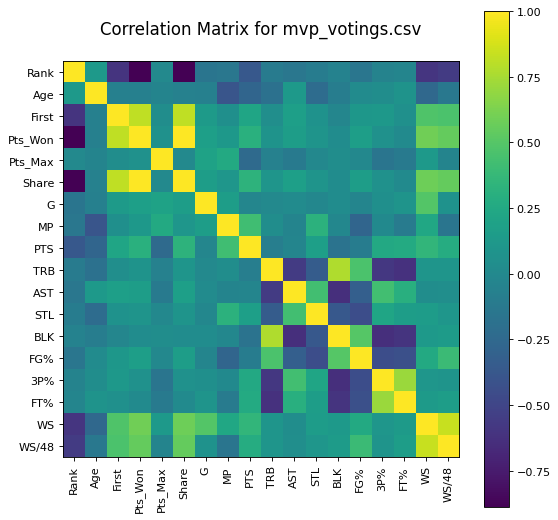

In [87]:
plotCorrelationMatrix(nba, 8)

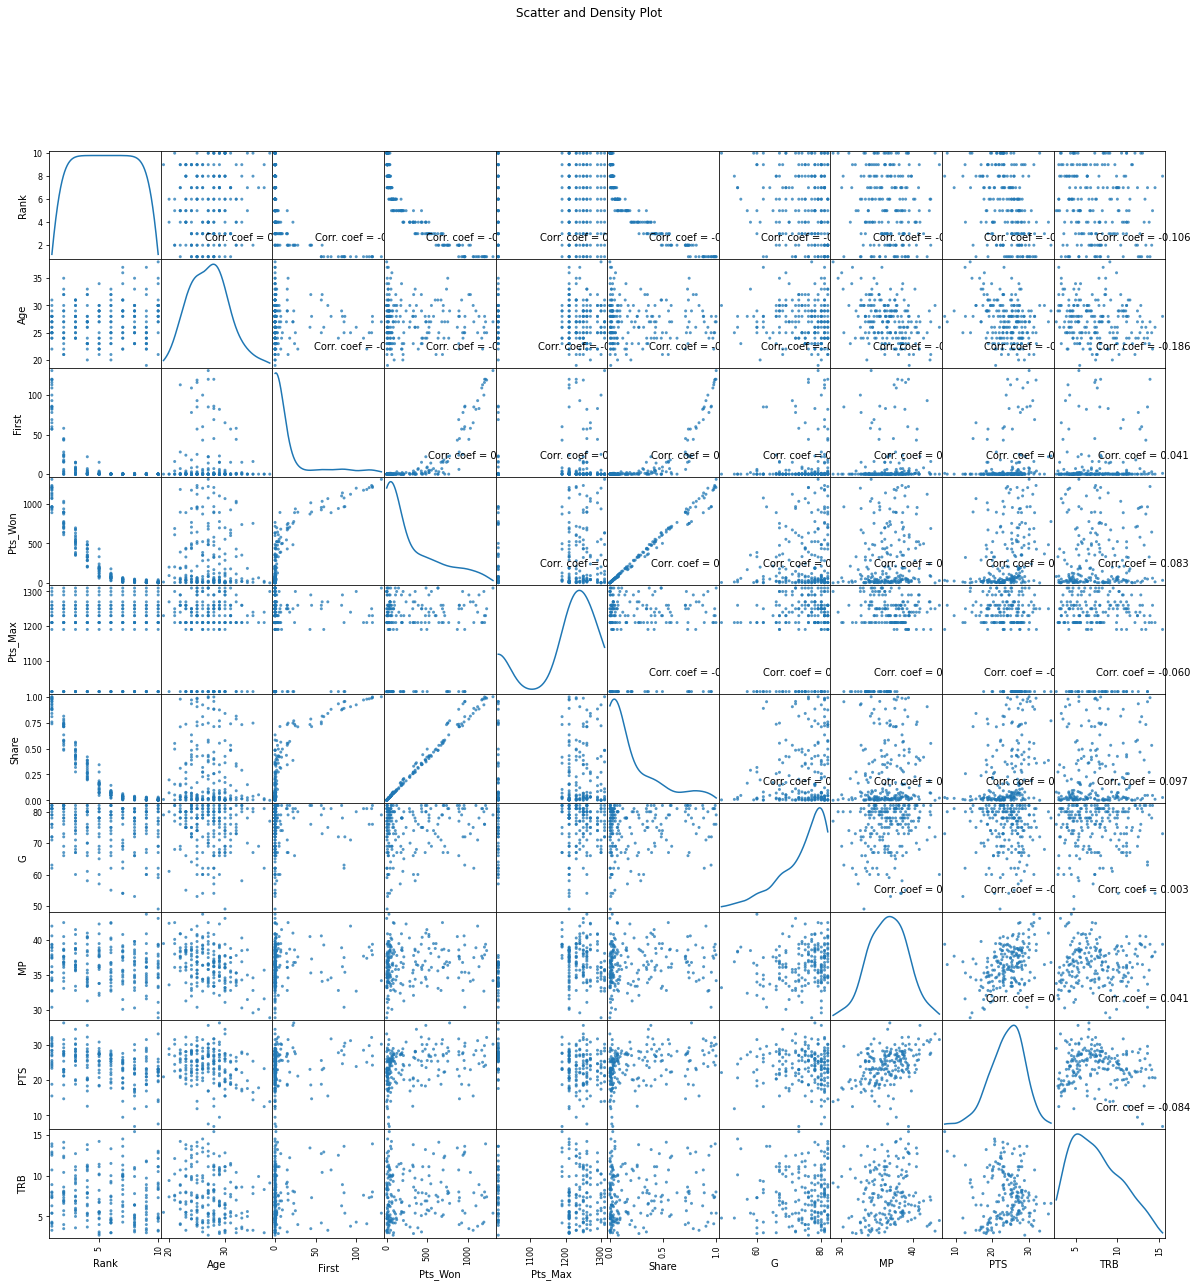

In [88]:
plotScatterMatrix(nba, 20, 10)